# Heart Disease Dataset - Group Proposal

### Introduction:


   **Cardiovascular** disease (_or commonly referred to as heart disease_) is a broad-stroke term used to describe patients <br> who have compromised circulatory systems due to a multitude of environmental, physical, and/or genetic factors. For example, age can often indicate how suceptible an individual is to developing a heart condition. <br> <br>In this project, our goal is to identify the likelihood of an individual having a test positive for **angiographic disease** (or heart disease). To perform this classification test, we have chosen to load the `Heart Disease Data Set` provided by the UCI Machine Learning Repository (UCI). This dataset includes many variables which play into predicting whether a patient has heart disease, many of which have been deprecated so we will only be focusing on the useable attributes these include  <br>
   
   - `age` - age in years 
   - `sex` - (1 = male; 0 = female) 
   - `cp` - chest pain type 1 = typical angina, 2 = atypical angina, 3 = non-angina pain, 4 = asymptomatic angina
   - `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) 
   - `chol` - serum cholestoral in mg/dl 
   - `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   - `restecg` - resting electrocardiographic results 
   - `thalach` - the max heart rate achieved
   - `exang` - exercise induced angina (1 = yes; 0 = no) 
   - `oldpeak` - ST depression induced by exercise relative to rest 
   - `slope` - the slope of the peak exercise ST segment 
   - `ca` - number of major vessels (0-3) colored by flourosopy 
   - `thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   - `num` - diagnosis of heart disease (angiographic disease status)


In [100]:
# Libraries needed for data classification and modeling #
library(tidyverse)
library(repr)
library(dplyr)
library(stringr)
library(tidymodels)
set.seed(1333)
options(repr.matrix.max.rows = 6)


## **Data Analysis** 

Here, we will be using the `tidyverse` R package to read the file from the `url` available on the web. For this dataset we will be analyzing the `processed.cleveland.data` frame which means we will need to reference it into R. Since the data has no column names, we need to instance them.  

In [101]:
#Read dataset from UCI repository
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_dataset <- read.csv(file = url, header = F)

#Prepare column names
names <- c("Age",
           "Sex",
           "Chest_Pain_Type",
           "Resting_Blood_Pressure",
           "Serum_Cholesterol",
           "Fasting_Blood_Sugar",
           "Resting_ECG",
           "Max_Heart_Rate_Achieved",
           "Exercise_Induced_Angina",
           "ST_Depression_Exercise",
           "Peak_Exercise_ST_Segment",
           "Num_Major_Vessels_Flouro",
           "Thalassemia",
           "Diagnosis_Heart_Disease") #Making columns human readable

#Apply column names to the dataframe
colnames(heart_disease_dataset) <- names

heart_disease_dataset 

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [102]:
heart_dataset_tidy <- heart_disease_dataset |> 
 mutate_at(c("Resting_ECG", 
                "Fasting_Blood_Sugar", 
                "Sex", 
                "Diagnosis_Heart_Disease", 
                "Exercise_Induced_Angina",
                "Peak_Exercise_ST_Segment", 
                "Chest_Pain_Type"), as_factor) |>
    mutate(Num_Major_Vessels_Flouro = as.numeric(Num_Major_Vessels_Flouro), Age = as.numeric(Age))  |> #Converting data types to factors and numerics since there are no decimals for doubles
    mutate(Diagnosis_Heart_Disease = fct_lump(Diagnosis_Heart_Disease, other_level = "1")) |> #Since a patient either has heart disease or doesnt this needs to be a binary value
    filter(across(everything(),
      .fns = ~ !is.na(.x), cols != "?")) # Removing NA's and ?
heart_dataset_tidy 
# Note while there are multiple people with the same age in our dataset this does not mean we must get rid of these rows because they are no repeated

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis_Heart_Disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1


## **Summary Tables**

In [103]:
heart_disease_split <- initial_split(heart_dataset_tidy, prop = 0.75, strata = Diagnosis_Heart_Disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

num_count_train <- heart_disease_train |>
    group_by(Diagnosis_Heart_Disease) |>
    summarize(count = n())
num_count_train

mean_train <- heart_disease_train |> # Finding the averages of relevant numeric predictors
    group_by(Age) |>
    summarize(avg_resting_bp = mean(Resting_Blood_Pressure), 
              avg_cholesterol = mean(Serum_Cholesterol), 
             avg_max_heart_rate = mean(Max_Heart_Rate_Achieved), avg_vessles = mean(Num_Major_Vessels_Flouro), 
              avg_std_exercise = mean(ST_Depression_Exercise), Diagnosis_Heart_Disease)
nrow(mean_train)


heart_disease_train
nrow(heart_disease_train)

Diagnosis_Heart_Disease,count
<fct>,<int>
0,120
1,103


`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


[1] 223

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,Peak_Exercise_ST_Segment,Num_Major_Vessels_Flouro,Thalassemia,Diagnosis_Heart_Disease
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
297,68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,1
298,57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,1
299,57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1


[1] 223

## **Graphing and Visualizations**

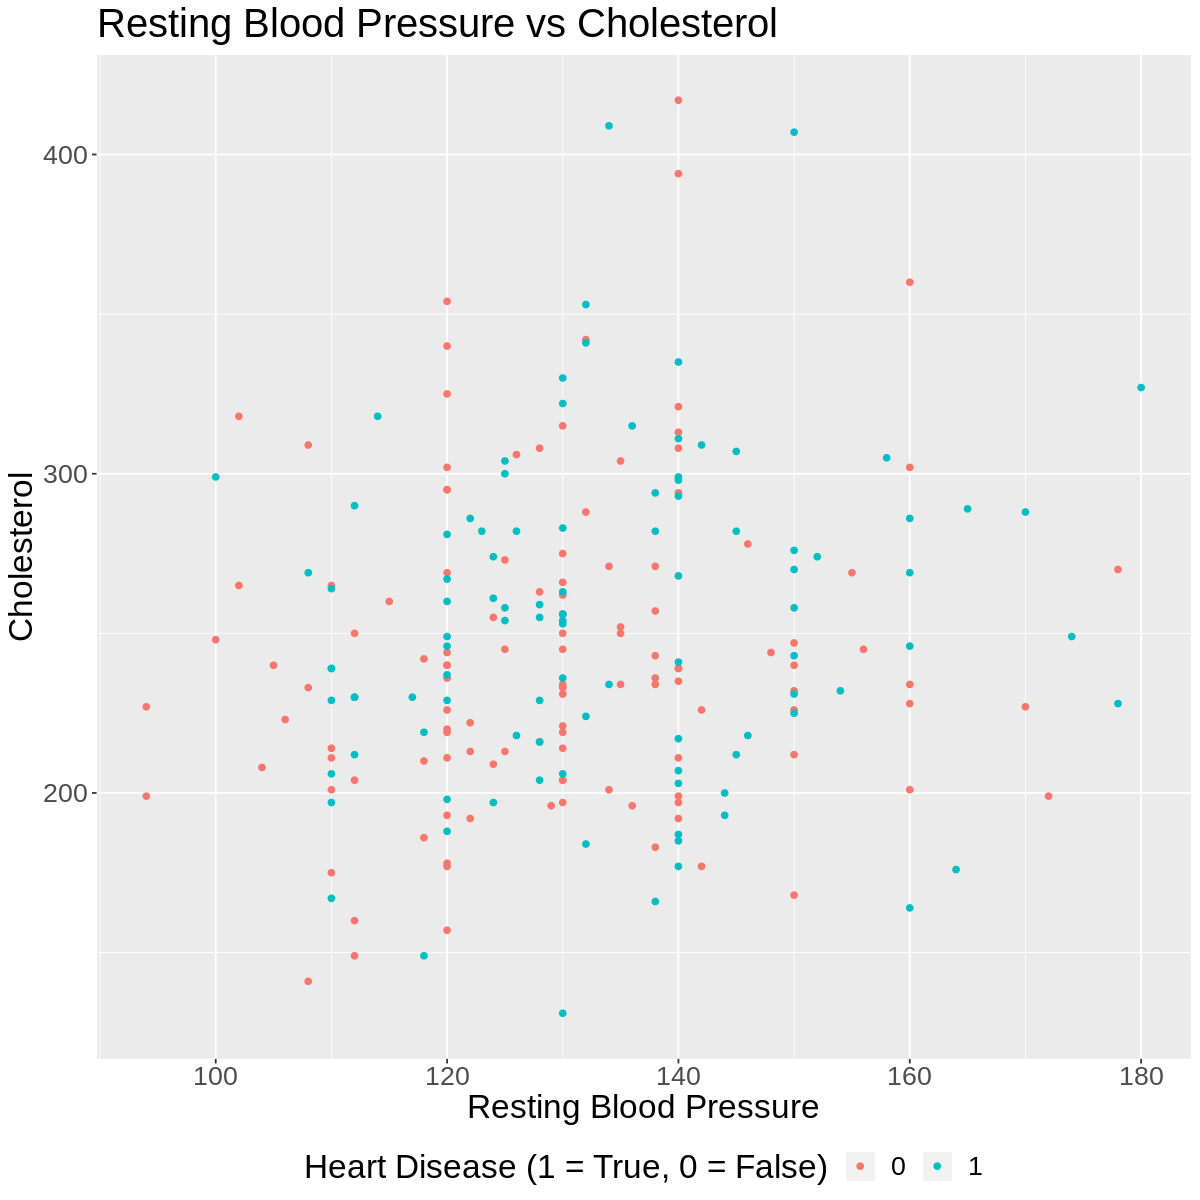

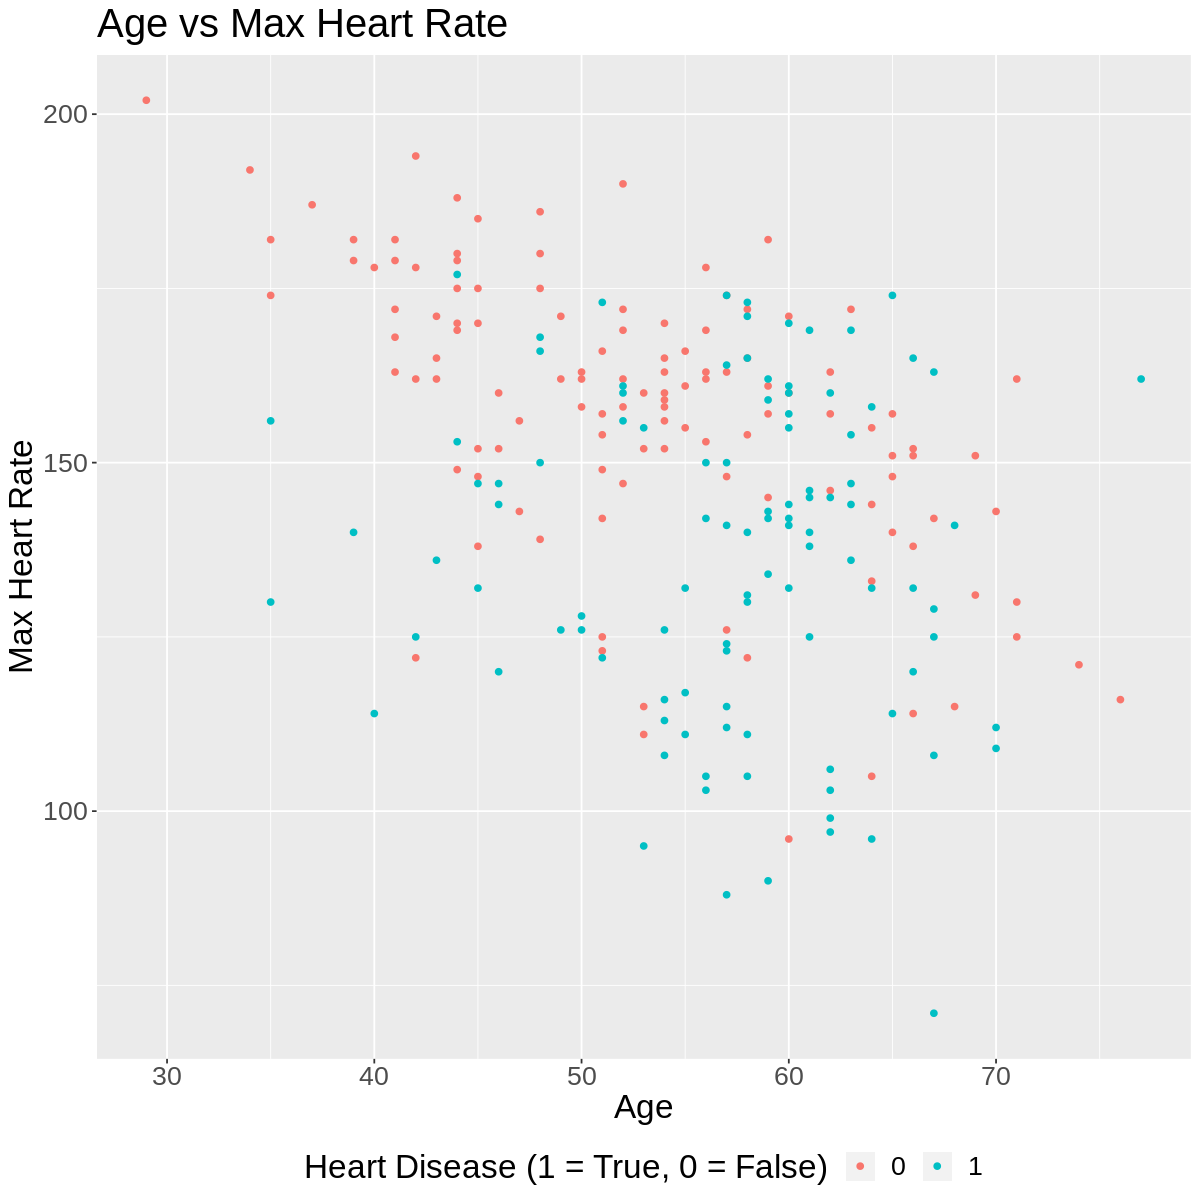

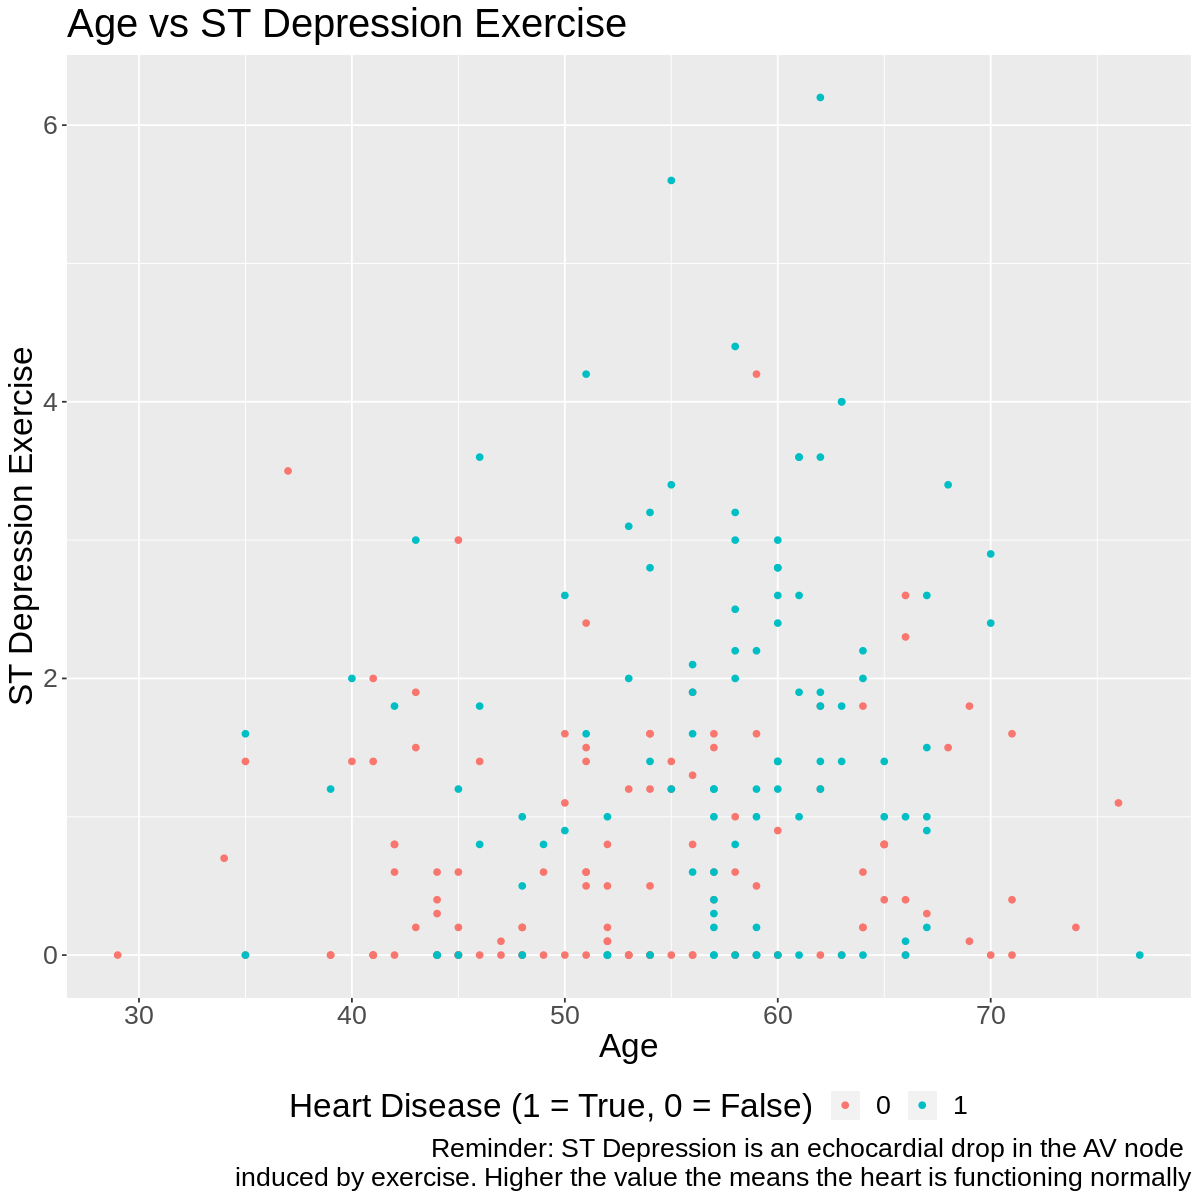

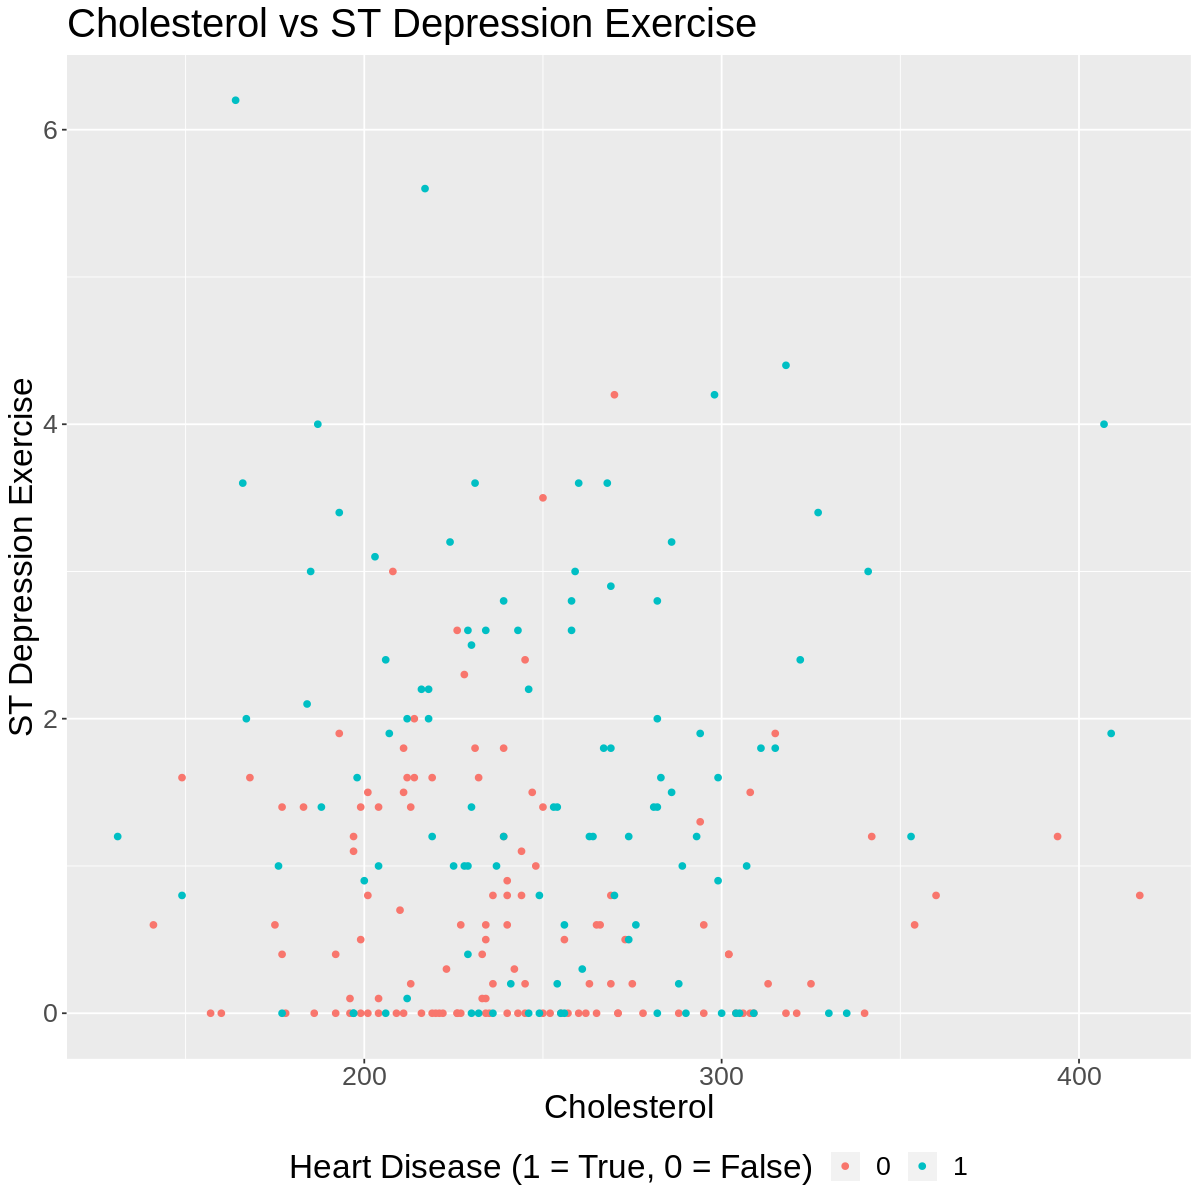

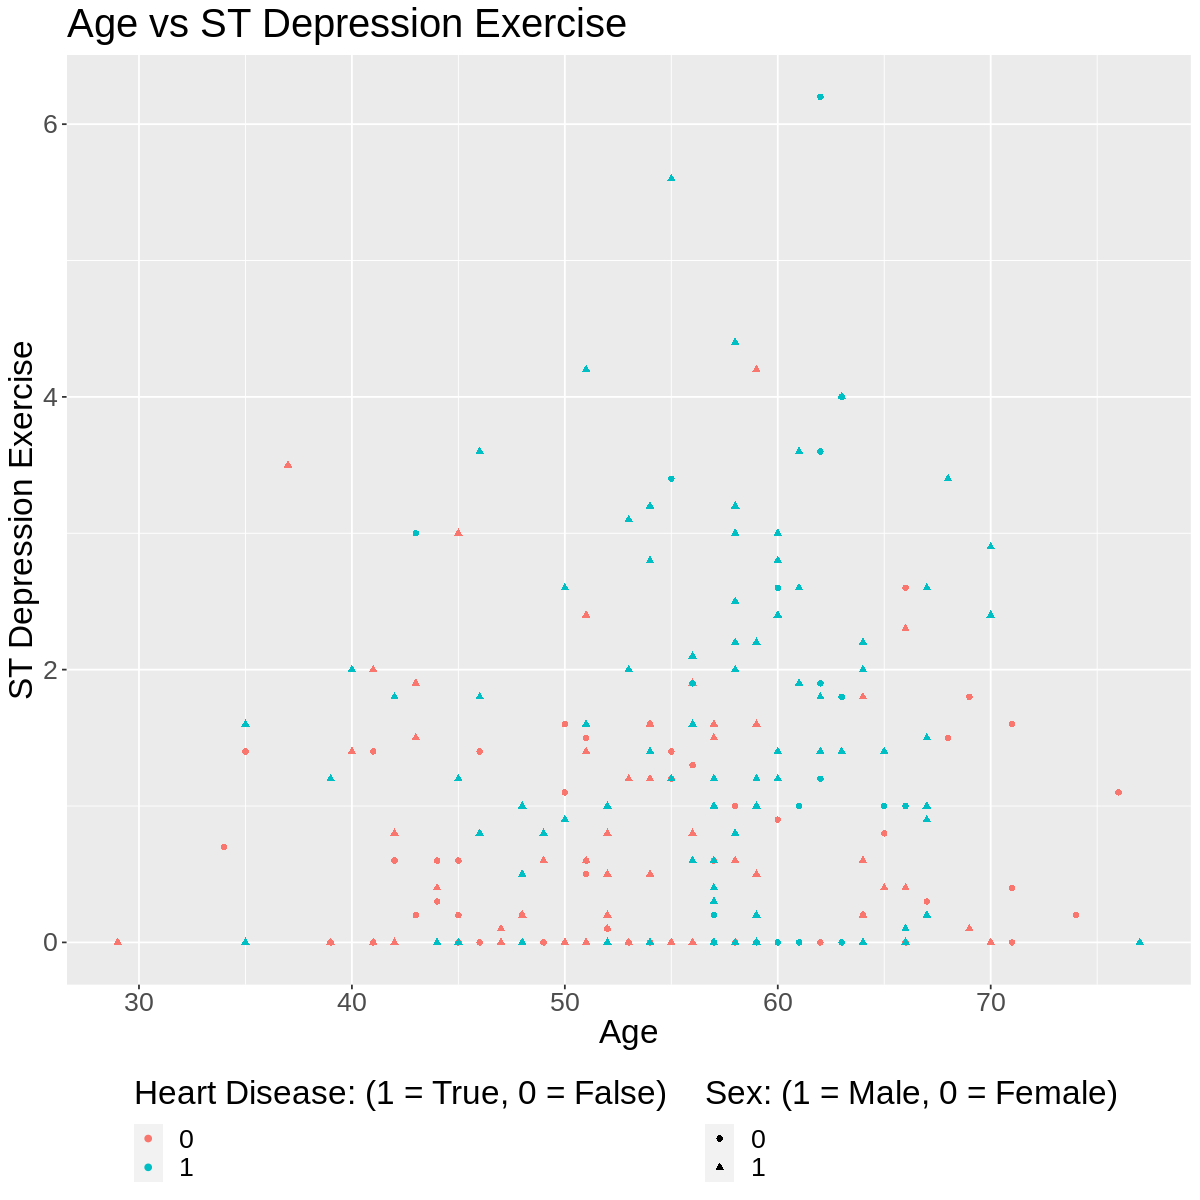

In [104]:
options(repr.plot.width = 10, repr.plot.height = 10)

Resting_Heart_vs_Cholesterol <- ggplot(heart_disease_train, aes(x = Resting_Blood_Pressure, y = Serum_Cholesterol, color = Diagnosis_Heart_Disease)) +
    geom_point()+
    labs(title = "Resting Blood Pressure vs Cholesterol", x = "Resting Blood Pressure", y = "Cholesterol", color = "Heart Disease (1 = True, 0 = False)")+
    theme(text = element_text(size = 20), legend.position = "bottom", legend.direction = "horizontal")
Resting_Heart_vs_Cholesterol

Age_vs_Max_Heart_Rate_Achieved <- ggplot(heart_disease_train, aes(x = Age, y = Max_Heart_Rate_Achieved, color = Diagnosis_Heart_Disease)) +
    geom_point()+
    labs(title = "Age vs Max Heart Rate", x = "Age", y = "Max Heart Rate", color = "Heart Disease (1 = True, 0 = False)")+
    theme(text = element_text(size = 20), legend.position = "bottom", legend.direction = "horizontal")
Age_vs_Max_Heart_Rate_Achieved


Age_vs_ST_Depression_Exercise <- ggplot(heart_disease_train, aes(x = Age, y = ST_Depression_Exercise, color = Diagnosis_Heart_Disease)) +
    geom_point()+
    labs(title = "Age vs ST Depression Exercise", x = "Age", y = "ST Depression Exercise", color = "Heart Disease (1 = True, 0 = False)", caption = "Reminder: ST Depression is an echocardial drop in the AV node \n induced by exercise. Higher the value the means the heart is functioning normally")+
    theme(text = element_text(size = 20), legend.position = "bottom", legend.direction = "horizontal")
Age_vs_ST_Depression_Exercise


Cholesterol_vs_ST_Depression_Exercise <- ggplot(heart_disease_train, aes(x = Serum_Cholesterol, y = ST_Depression_Exercise, color = Diagnosis_Heart_Disease)) +
    geom_point()+
    labs(title = "Cholesterol vs ST Depression Exercise", x = "Cholesterol", y = "ST Depression Exercise", color = "Heart Disease (1 = True, 0 = False)")+
    theme(text = element_text(size = 20), legend.position = "bottom", legend.direction = "horizontal")
Cholesterol_vs_ST_Depression_Exercise

Sex_vs_ST_Depression_Exercise <- ggplot(heart_disease_train, aes(x = Age, y = ST_Depression_Exercise, color = Diagnosis_Heart_Disease, shape = Sex)) +
    geom_point()+
    labs(title = "Age vs ST Depression Exercise", x = "Age", y = "ST Depression Exercise", color = "Heart Disease: (1 = True, 0 = False)", shape = "Sex: (1 = Male, 0 = Female)")+
    theme(text = element_text(size = 20), legend.position = "bottom", legend.direction = "vertical")
Sex_vs_ST_Depression_Exercise


## **Methods** 

Taking the average of the numeric attributes has allowed us to recognize non-factors in determining whether a patient has heart disease or not. The relevant observations we will be using for our project are `Age`,  `Serum_Cholesterol`, `Max_Heart_Rate_Achieved`, `Resting_Blood_Pressure`, `ST_Depression_Exercise`, and `Diagnosis_Heart_Disease`. Using k classification we will demonstrate via a scatter plot (as the one shown above) which variables determine an individuals likelihood of developing a heart disease. We plan to build prep and bake a model that can illustrate this. 

## **Expected Results** 


We expect that the results of our classification would be that individuals with higher cholesterol, lower max heart rate, higher resting blood pressure, lower ST Depression, and those who are old will have an increased likelihood of developing angiographic disease. The results of this classification will hopefully shed led light on the scientific evidence that healthy living affects your susceptibility to heart disease and will hopefully shift the social fat acceptance movement in America. As a result this could lead to many unhealthy individuals questioning their life choices and bring us to a future where healthy living is promoted and praised rather than shunned upon.